# A Visual of Ligands and their Residue Neighbors
A demo provided using 1a4w and a max distance of 3 angstroms.

In [17]:
import sys
from pathlib import Path

ROOT = Path().resolve().parents[0]
sys.path.append(str(ROOT / "src"))

from ligand_neighborhood.structure import create_structure
import nglview as nv

## Extract/Prep

### For Demo Purposes, the following cell is populated with the only values user needs to change to visualize the desired target structure.

In [18]:
struct = "1a4w"
max_distance = 3

In [19]:
s = create_structure(struct)
n = s.neighbors(max_distance)

r_resname = []
l_resname = []
for ligand, residues in n.items():
    for rkey, dist in residues:
            r_resname.append(rkey)
    l_resname.append(ligand)

## Visual

In [20]:
path = ROOT / "src" / "ligand_neighborhood" / "data" / f"{struct}.cif"
view = nv.show_structure_file(str(path))
view.clear_representations()
view.add_cartoon('protein', color='gray')

for i in range(len(l_resname)):
     formula = f'{l_resname[i][0]} and :{l_resname[i][1]} and ({l_resname[i][2]} or {l_resname[i][2]+1} or {l_resname[i][2]-1}'
     view.add_ball_and_stick(selection=formula, color='red')

for i in range(len(r_resname)):
    formula = f'{r_resname[i][0]} and :{r_resname[i][1]} and ({r_resname[i][2]} or {r_resname[i][2]+1} or {r_resname[i][2]-1}'
    view.add_licorice(selection=formula ,color='pink')

view

NGLWidget()

In [23]:
view.render_image()

Image(value=b'', width='99%')

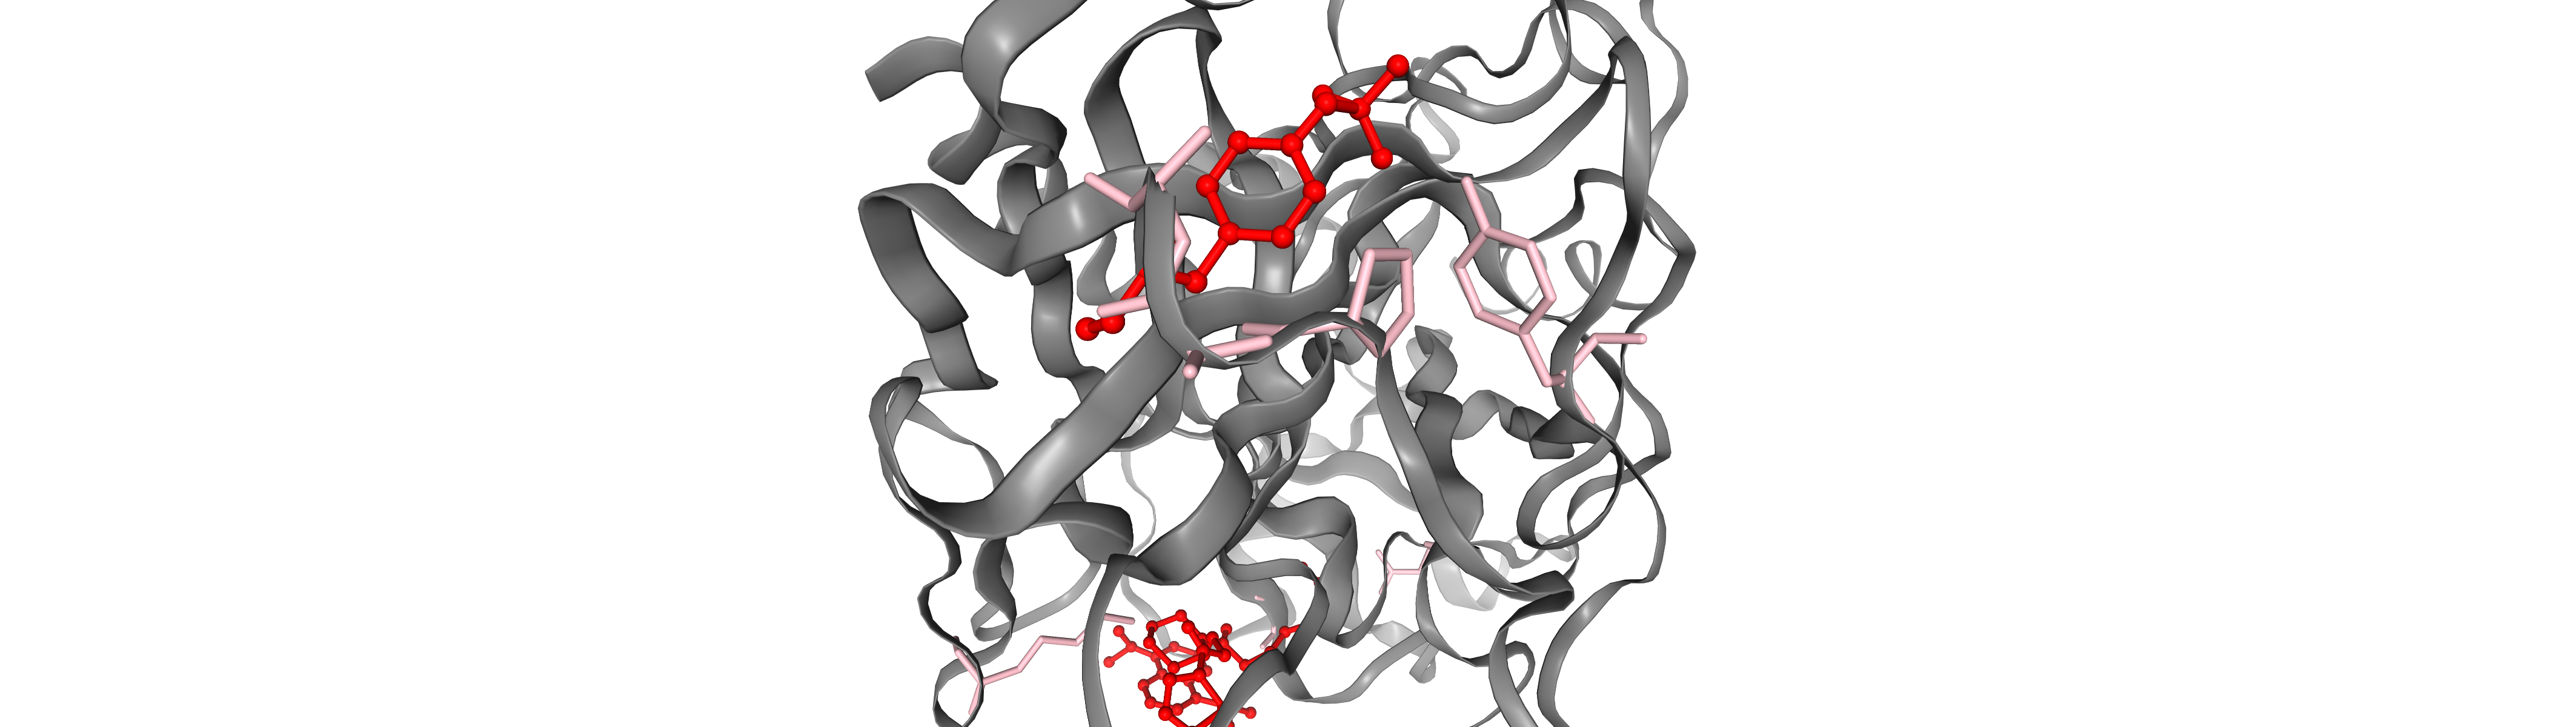

In [24]:
view._display_image()